# Zadanie z grą FlapPyBird

Wczytanie potrzebnych bibliotek

In [37]:
import csv
import operator
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import linear_model

from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

Wykorzystywane zmienne

In [3]:
FILE_NAME = '3'
FILE_PATH = FILE_NAME + '.csv'
OUT_FILE = FILE_NAME + 'out.csv'
Etykiety = []
Dane = []

zapisanie ścieżki do csv

In [4]:
def save_to_csv(X, Y):
    with open(OUT_FILE, 'w', newline='') as csv_file:
        employee_writer = csv.writer(csv_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        for i in range(0, len(X)):
            employee_writer.writerow([X.item(i), Y.item(i)])


Implementacja funkcji do regresji liniowej - wykorzystanie LinearRegression

In [6]:
def Poli_reg_w(X,Y):

    x = X[:, np.newaxis]
    y = Y[:, np.newaxis]
    r=[]
    
    for i in range(2,22):
        polynomial_features= PolynomialFeatures(degree=i)
        x_poly = polynomial_features.fit_transform(x)

        model = LinearRegression()
        model.fit(x_poly, y)
        y_poly_pred = model.predict(x_poly)
    
        rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
        r2 = r2_score(y,y_poly_pred)
        r.append((r2,i))
    #print(rmse)
    #print(r2)
    #print(r)
    print(max(r))
    
    plt.scatter(X,Y)
    plt.plot(X, y_poly_pred, color='m')
    save_to_csv(X, y_poly_pred) #ścieżka 
    plt.show()

(0.8879764285646212, 19)


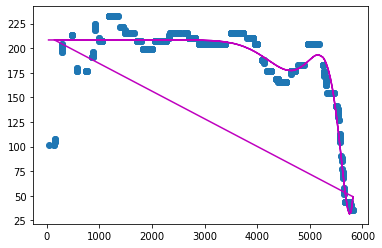

In [7]:
with open(FILE_PATH, mode='r') as plik_csv:
    csv_Rdr = csv.reader(plik_csv, delimiter=',')
    Etykiety = next(csv_Rdr)
    for wiersz in csv_Rdr:
        Dane.append(wiersz)

X = np.empty([1])
Y = np.empty([1])
for d in Dane:
    X = np.append(X, float(d[0]))
    Y = np.append(Y, float(d[1]))
Poli_reg_w(X, Y)

Najlepsze dopasowanie uzyskałam wielomianem 19 stopnia 

# Wygenerowana ścieżka 

In [59]:
x = X[:, np.newaxis]
y = Y[:, np.newaxis]
polynomial_features= PolynomialFeatures(degree=19)
x_poly = polynomial_features.fit_transform(x)
model = LinearRegression()
Xz = np.arange(0,len(y))
model.fit(Xz.reshape(-1, 1), y.reshape(-1, 1))
Predykcje = model.predict(Xz.reshape(-1, 1))
Predykcje

array([[210.00897091],
       [209.95609553],
       [209.90322014],
       [209.85034476],
       [209.79746938],
       [209.744594  ],
       [209.69171862],
       [209.63884324],
       [209.58596785],
       [209.53309247],
       [209.48021709],
       [209.42734171],
       [209.37446633],
       [209.32159094],
       [209.26871556],
       [209.21584018],
       [209.1629648 ],
       [209.11008942],
       [209.05721403],
       [209.00433865],
       [208.95146327],
       [208.89858789],
       [208.84571251],
       [208.79283712],
       [208.73996174],
       [208.68708636],
       [208.63421098],
       [208.5813356 ],
       [208.52846022],
       [208.47558483],
       [208.42270945],
       [208.36983407],
       [208.31695869],
       [208.26408331],
       [208.21120792],
       [208.15833254],
       [208.10545716],
       [208.05258178],
       [207.9997064 ],
       [207.94683101],
       [207.89395563],
       [207.84108025],
       [207.78820487],
       [207

# Własna implementacja regresji 

In [48]:
def poli_regression(Xin, Yin):
    first_degree = 2
    last_degree = 22
    degree_step = 1
    r= []

    plt.scatter(Xin, Yin)
    
    for degree in range(first_degree, last_degree, degree_step):
        model = make_pipeline(PolynomialFeatures(degree), Ridge())
        model.fit(Xin.reshape(-1, 1), Yin)
        Yout = model.predict(Xin.reshape(-1, 1))
        r2 = r2_score(Yin,Yout)
        r.append((r2,degree))
        
    #print(max(r))
    najlepszy = max(r)
    #print(najlepszy[1])
    model = make_pipeline(PolynomialFeatures(najlepszy[1]), Ridge())
    model.fit(Xin.reshape(-1, 1), Yin)
    Yout = model.predict(Xin.reshape(-1, 1))
    plt.plot(Xin, Yout,label="degree %d" % najlepszy[1], color ='red')
    save_to_csv(Xin, Yout) #ścieżka 

    plt.legend(loc='lower left')
    plt.title('Polynomial regression')
    plt.show()

/home/justyna/.local/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.25762e-19): result may not be accurate.
  overwrite_a=True).T
/home/justyna/.local/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.72918e-26): result may not be accurate.
  overwrite_a=True).T
/home/justyna/.local/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.57953e-34): result may not be accurate.
  overwrite_a=True).T
/home/justyna/.local/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.74128e-41): result may not be accurate.
  overwrite_a=True).T
/home/justyna/.local/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.77733e-49): result may not be accurate.
  overwrite_a=True).T
/home/justyna/.local/lib/pytho

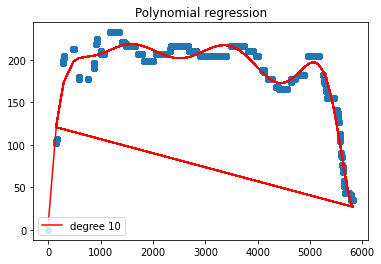

In [49]:
with open(FILE_PATH, mode='r') as plik_csv:
    csv_Rdr = csv.reader(plik_csv, delimiter=',')
    Etykiety = next(csv_Rdr)
    for wiersz in csv_Rdr:
        Dane.append(wiersz)

X = np.empty([1])
Y = np.empty([1])
for d in Dane:
    X = np.append(X, float(d[0]))
    Y = np.append(Y, float(d[1]))
poli_regression(X, Y)

Według wyliczenia, najlepsze dopasowanie uzyskuję dla wielomiana 10 stopnia 

# Przewidywana ścieżka

In [53]:
model = make_pipeline(PolynomialFeatures(10), Ridge())
model.fit(X.reshape(-1, 1), Y)
Yout = model.predict(X.reshape(-1, 1))
print(Yout)

[  9.50203424 120.75537858 122.81810797 ...  28.00578449  27.58190949
  27.20979849]


/home/justyna/.local/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.91212e-79): result may not be accurate.
  overwrite_a=True).T
